Goal: Investigate how DSNN fares in a toy problem. 

Compare following models:
- Large dense (same architecture as large sparse, but dense)
- Small dense (same number of params as large sparse, but dense)
- Large sparse
- Large sparse + dynamic sparse


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# general imports
import os
import numpy as np

# torch imports
import torch
import torch.optim as optim
import torch.optim.lr_scheduler as schedulers
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchsummary import summary

# nupic research imports
from nupic.research.frameworks.pytorch.image_transforms import RandomNoise
from nupic.torch.modules import KWinners

# local library
from networks_module.base_networks import *
from models_module.base_models import *

# local files
from utils import *
import math

# plotting
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = (12,6)

PATH_TO_WHERE_DATASET_WILL_BE_SAVED = PATH = "~/nta/datasets"

In [3]:
# load dataset
config = (dict(
    dataset_name="MNIST",
    data_dir="~/nta/datasets",
    test_noise=True
))
dataset = Dataset(config)

## Large dense

In [4]:
from models_module.base_models import BaseModel
from networks_module.hebbian_networks import MLP
# load a regular network
network = MLP()
# load a regular base model for training
model = BaseModel(network=network)
model.setup()

In [5]:
%%time
large_dense = model.train(dataset, 30, test_noise=False);

Train acc: 0.8942, Val acc: 0.9526
Train acc: 0.9601, Val acc: 0.9649
Train acc: 0.9705, Val acc: 0.9681
Train acc: 0.9757, Val acc: 0.9724
Train acc: 0.9788, Val acc: 0.9709
Train acc: 0.9795, Val acc: 0.9670
Train acc: 0.9827, Val acc: 0.9733
Train acc: 0.9831, Val acc: 0.9708
Train acc: 0.9857, Val acc: 0.9766
Train acc: 0.9868, Val acc: 0.9741
Train acc: 0.9861, Val acc: 0.9747
Train acc: 0.9864, Val acc: 0.9732
Train acc: 0.9881, Val acc: 0.9681
Train acc: 0.9880, Val acc: 0.9770
Train acc: 0.9903, Val acc: 0.9757
Train acc: 0.9886, Val acc: 0.9770
Train acc: 0.9895, Val acc: 0.9762
Train acc: 0.9905, Val acc: 0.9746
Train acc: 0.9911, Val acc: 0.9763
Train acc: 0.9899, Val acc: 0.9753
Train acc: 0.9897, Val acc: 0.9751
Train acc: 0.9913, Val acc: 0.9750
Train acc: 0.9912, Val acc: 0.9729
Train acc: 0.9909, Val acc: 0.9714
Train acc: 0.9907, Val acc: 0.9738
Train acc: 0.9927, Val acc: 0.9777
Train acc: 0.9925, Val acc: 0.9789
Train acc: 0.9912, Val acc: 0.9763
Train acc: 0.9921, V

## Large sparse

In [6]:
from models_module.base_models import SparseModel
# load a regular network
network = MLP()
# load a regular base model for training
config = dict(
    debug_sparse=True,
    on_perc=0.1,
)
model = SparseModel(network=network, config=config)
model.setup()

In [7]:
%%time
large_sparse = model.train(dataset, 30, test_noise=False);

Train acc: 0.3993, Val acc: 0.8754
Train acc: 0.9092, Val acc: 0.9273
Train acc: 0.9350, Val acc: 0.9415
Train acc: 0.9454, Val acc: 0.9444
Train acc: 0.9500, Val acc: 0.9523
Train acc: 0.9554, Val acc: 0.9510
Train acc: 0.9577, Val acc: 0.9537
Train acc: 0.9595, Val acc: 0.9569
Train acc: 0.9618, Val acc: 0.9543
Train acc: 0.9635, Val acc: 0.9570
Train acc: 0.9643, Val acc: 0.9585
Train acc: 0.9668, Val acc: 0.9579
Train acc: 0.9677, Val acc: 0.9577
Train acc: 0.9680, Val acc: 0.9584
Train acc: 0.9694, Val acc: 0.9610
Train acc: 0.9680, Val acc: 0.9595
Train acc: 0.9707, Val acc: 0.9575
Train acc: 0.9707, Val acc: 0.9618
Train acc: 0.9708, Val acc: 0.9581
Train acc: 0.9711, Val acc: 0.9614
Train acc: 0.9714, Val acc: 0.9567
Train acc: 0.9713, Val acc: 0.9591
Train acc: 0.9728, Val acc: 0.9611
Train acc: 0.9735, Val acc: 0.9576
Train acc: 0.9746, Val acc: 0.9539
Train acc: 0.9749, Val acc: 0.9610
Train acc: 0.9738, Val acc: 0.9622
Train acc: 0.9742, Val acc: 0.9560
Train acc: 0.9754, V

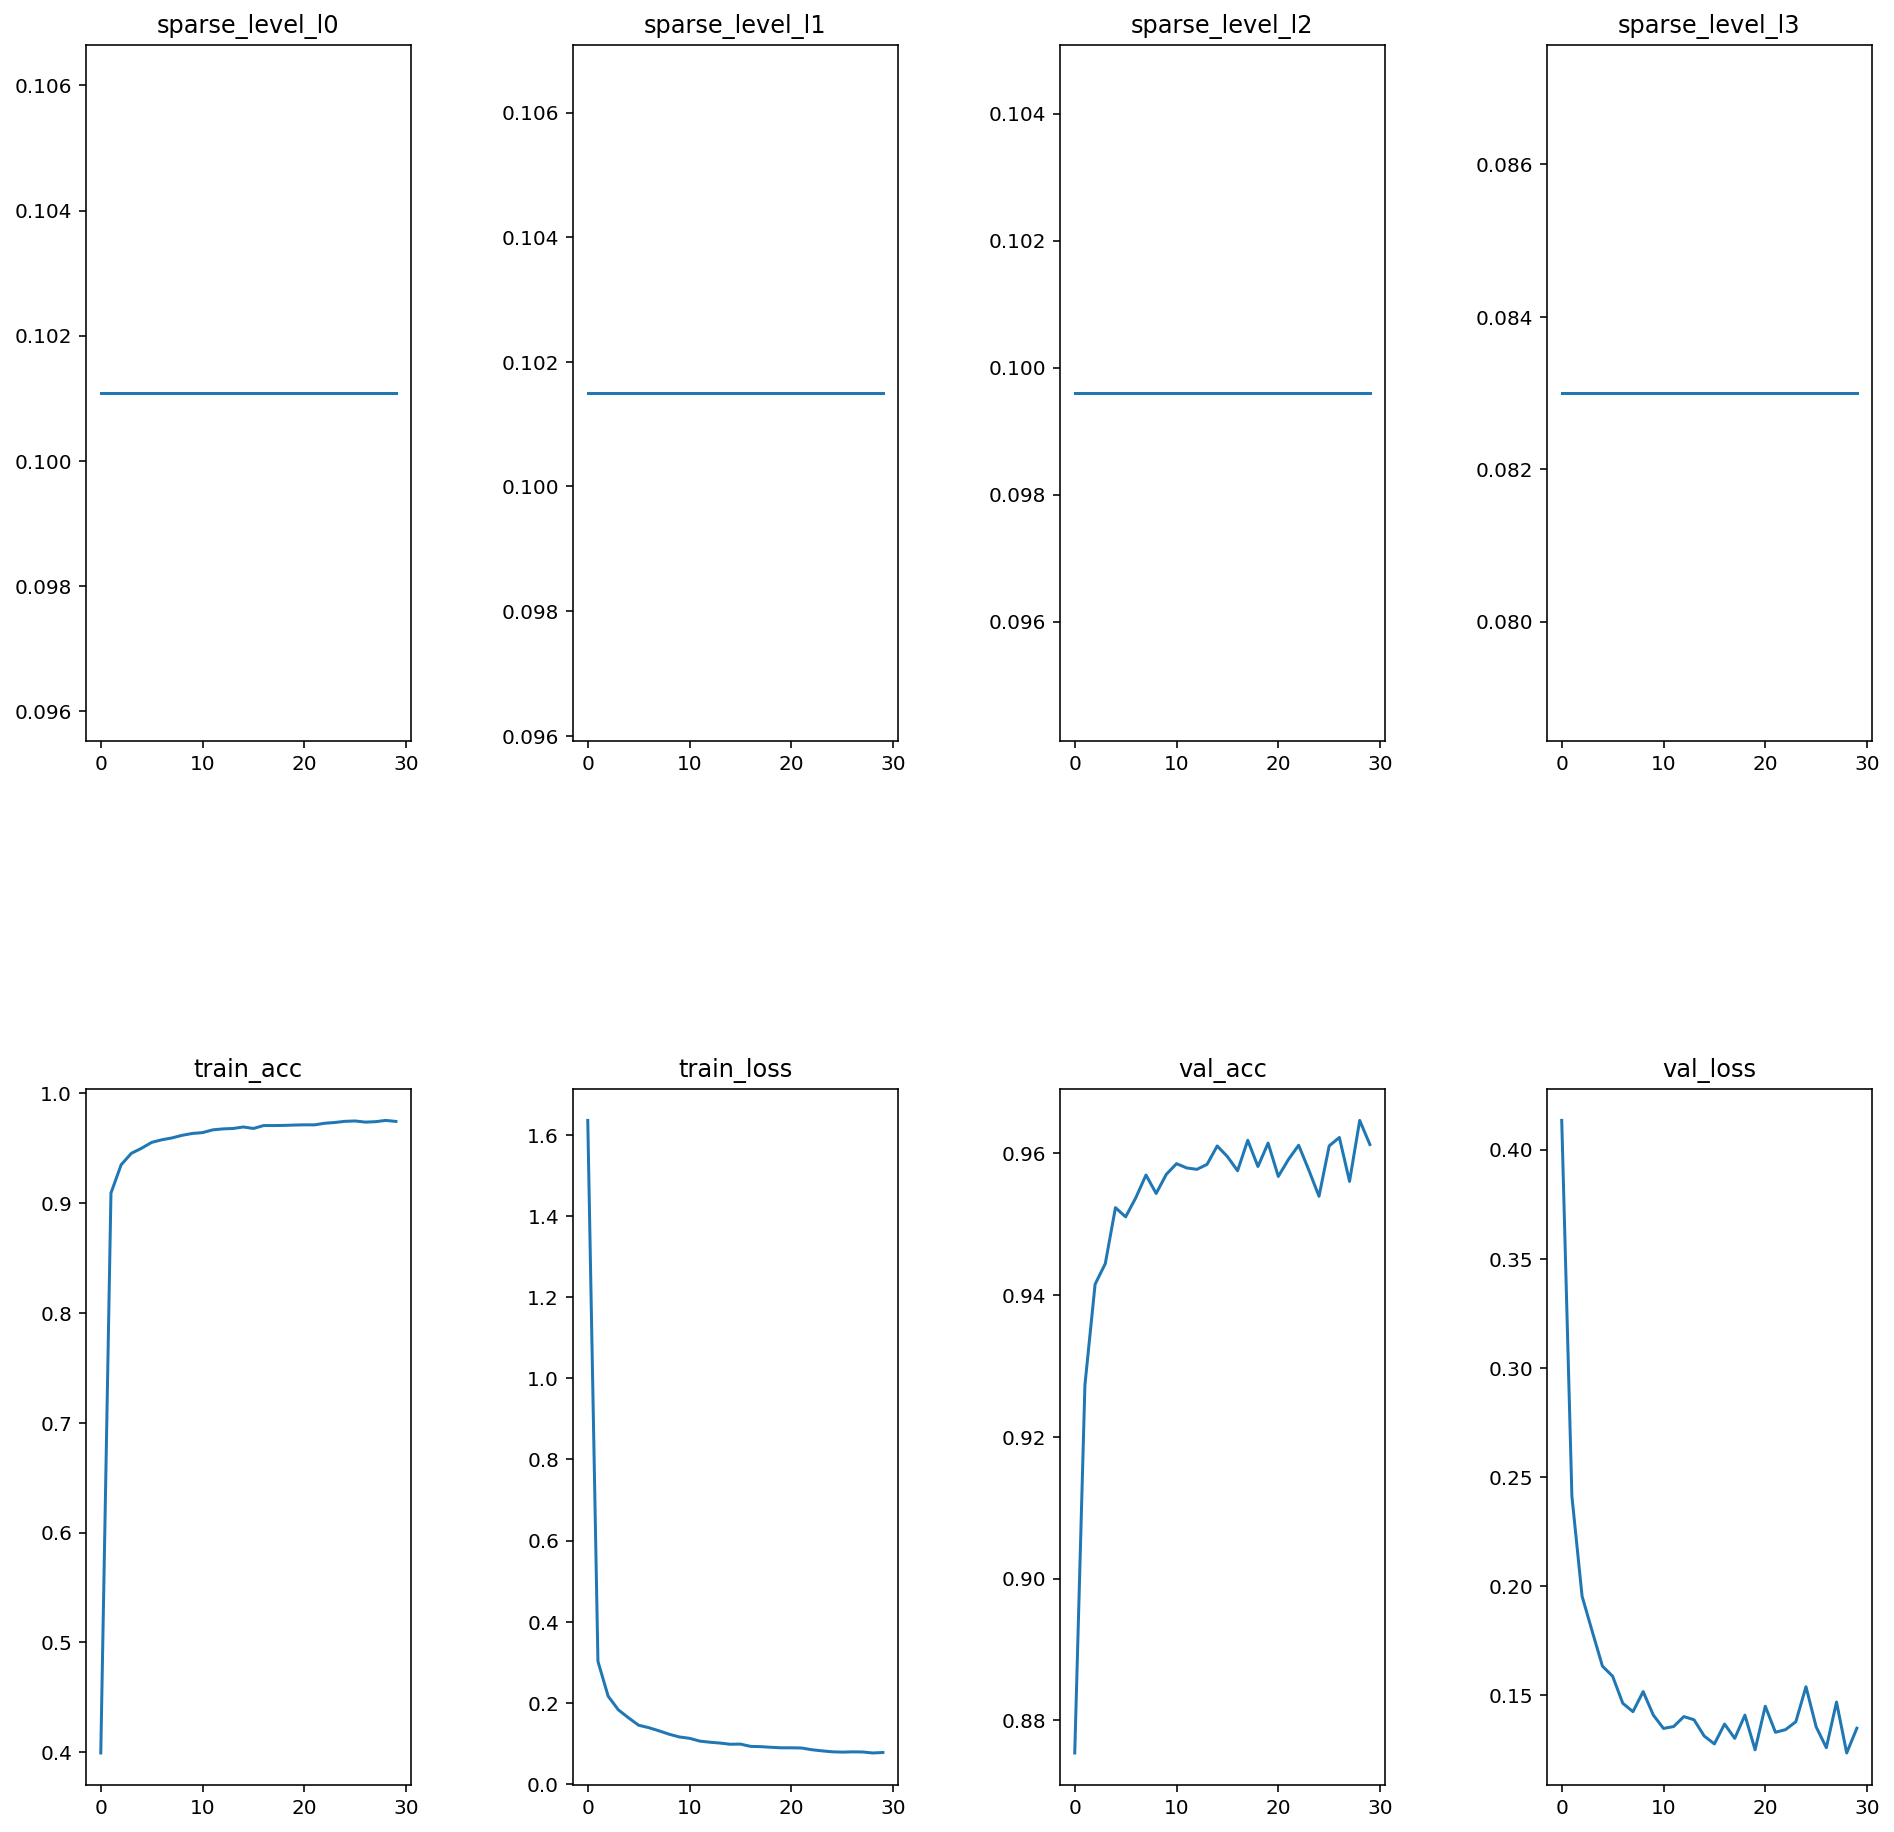

In [9]:
results = large_sparse
h, w = math.ceil(len(results)/4), 4 
combinations = []
for i in range(h):
    for j in range(w):
        combinations.append((i,j))

fig, axs = plt.subplots(h, w, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(16,16)
for (i, j), k in zip(combinations[:len(results)], sorted(results.keys())):
    axs[i, j].plot(range(len(results[k])), results[k])
    axs[i, j].set_title(k)

## Large dynamic sparse

In [10]:
from models_module.base_models import DSNNMixedHeb
from networks_module.hebbian_networks import MLPHeb
# load a regular network
network = MLPHeb()
# load a regular base model for training
config = dict(
    weight_prune_perc=0.15,
    hebbian_prune_perc=0.60,
    pruning_es =False,
    pruning_active=True,
    pruning_interval=1,
    debug_sparse=True,
    on_perc=0.1,
)
model = DSNNMixedHeb(network=network, config=config)
model.setup()

# debug sparsity
# [b/a for a,b in zip([784*400, 400*400, 400*400, 400*10], model.num_params)]

In [11]:
%%time
dynamic_sparse = model.train(dataset, 30, test_noise=False);

/Users/lsouza/miniconda3/envs/numenta/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lsouza/miniconda3/envs/numenta/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Train acc: 0.4133, Val acc: 0.8929
Train acc: 0.9031, Val acc: 0.9370
Train acc: 0.9349, Val acc: 0.9479
Train acc: 0.9443, Val acc: 0.9472
Train acc: 0.9517, Val acc: 0.9548
Train acc: 0.9576, Val acc: 0.9488
Train acc: 0.9600, Val acc: 0.9493
Train acc: 0.9613, Val acc: 0.9615
Train acc: 0.9654, Val acc: 0.9579
Train acc: 0.9628, Val acc: 0.9527
Train acc: 0.9677, Val acc: 0.9638
Train acc: 0.9664, Val acc: 0.9605
Train acc: 0.9683, Val acc: 0.9624
Train acc: 0.9707, Val acc: 0.9598
Train acc: 0.9700, Val acc: 0.9637
Train acc: 0.9715, Val acc: 0.9633
Train acc: 0.9730, Val acc: 0.9658
Train acc: 0.9724, Val acc: 0.9645
Train acc: 0.9732, Val acc: 0.9606
Train acc: 0.9726, Val acc: 0.9623
Train acc: 0.9717, Val acc: 0.9599
Train acc: 0.9722, Val acc: 0.9624
Train acc: 0.9748, Val acc: 0.9611
Train acc: 0.9732, Val acc: 0.9658
Train acc: 0.9738, Val acc: 0.9550
Train acc: 0.9769, Val acc: 0.9670
Train acc: 0.9749, Val acc: 0.9636
Train acc: 0.9771, Val acc: 0.9681
Train acc: 0.9765, V

In [12]:
# results.keys(), len(results)

In [13]:
# results

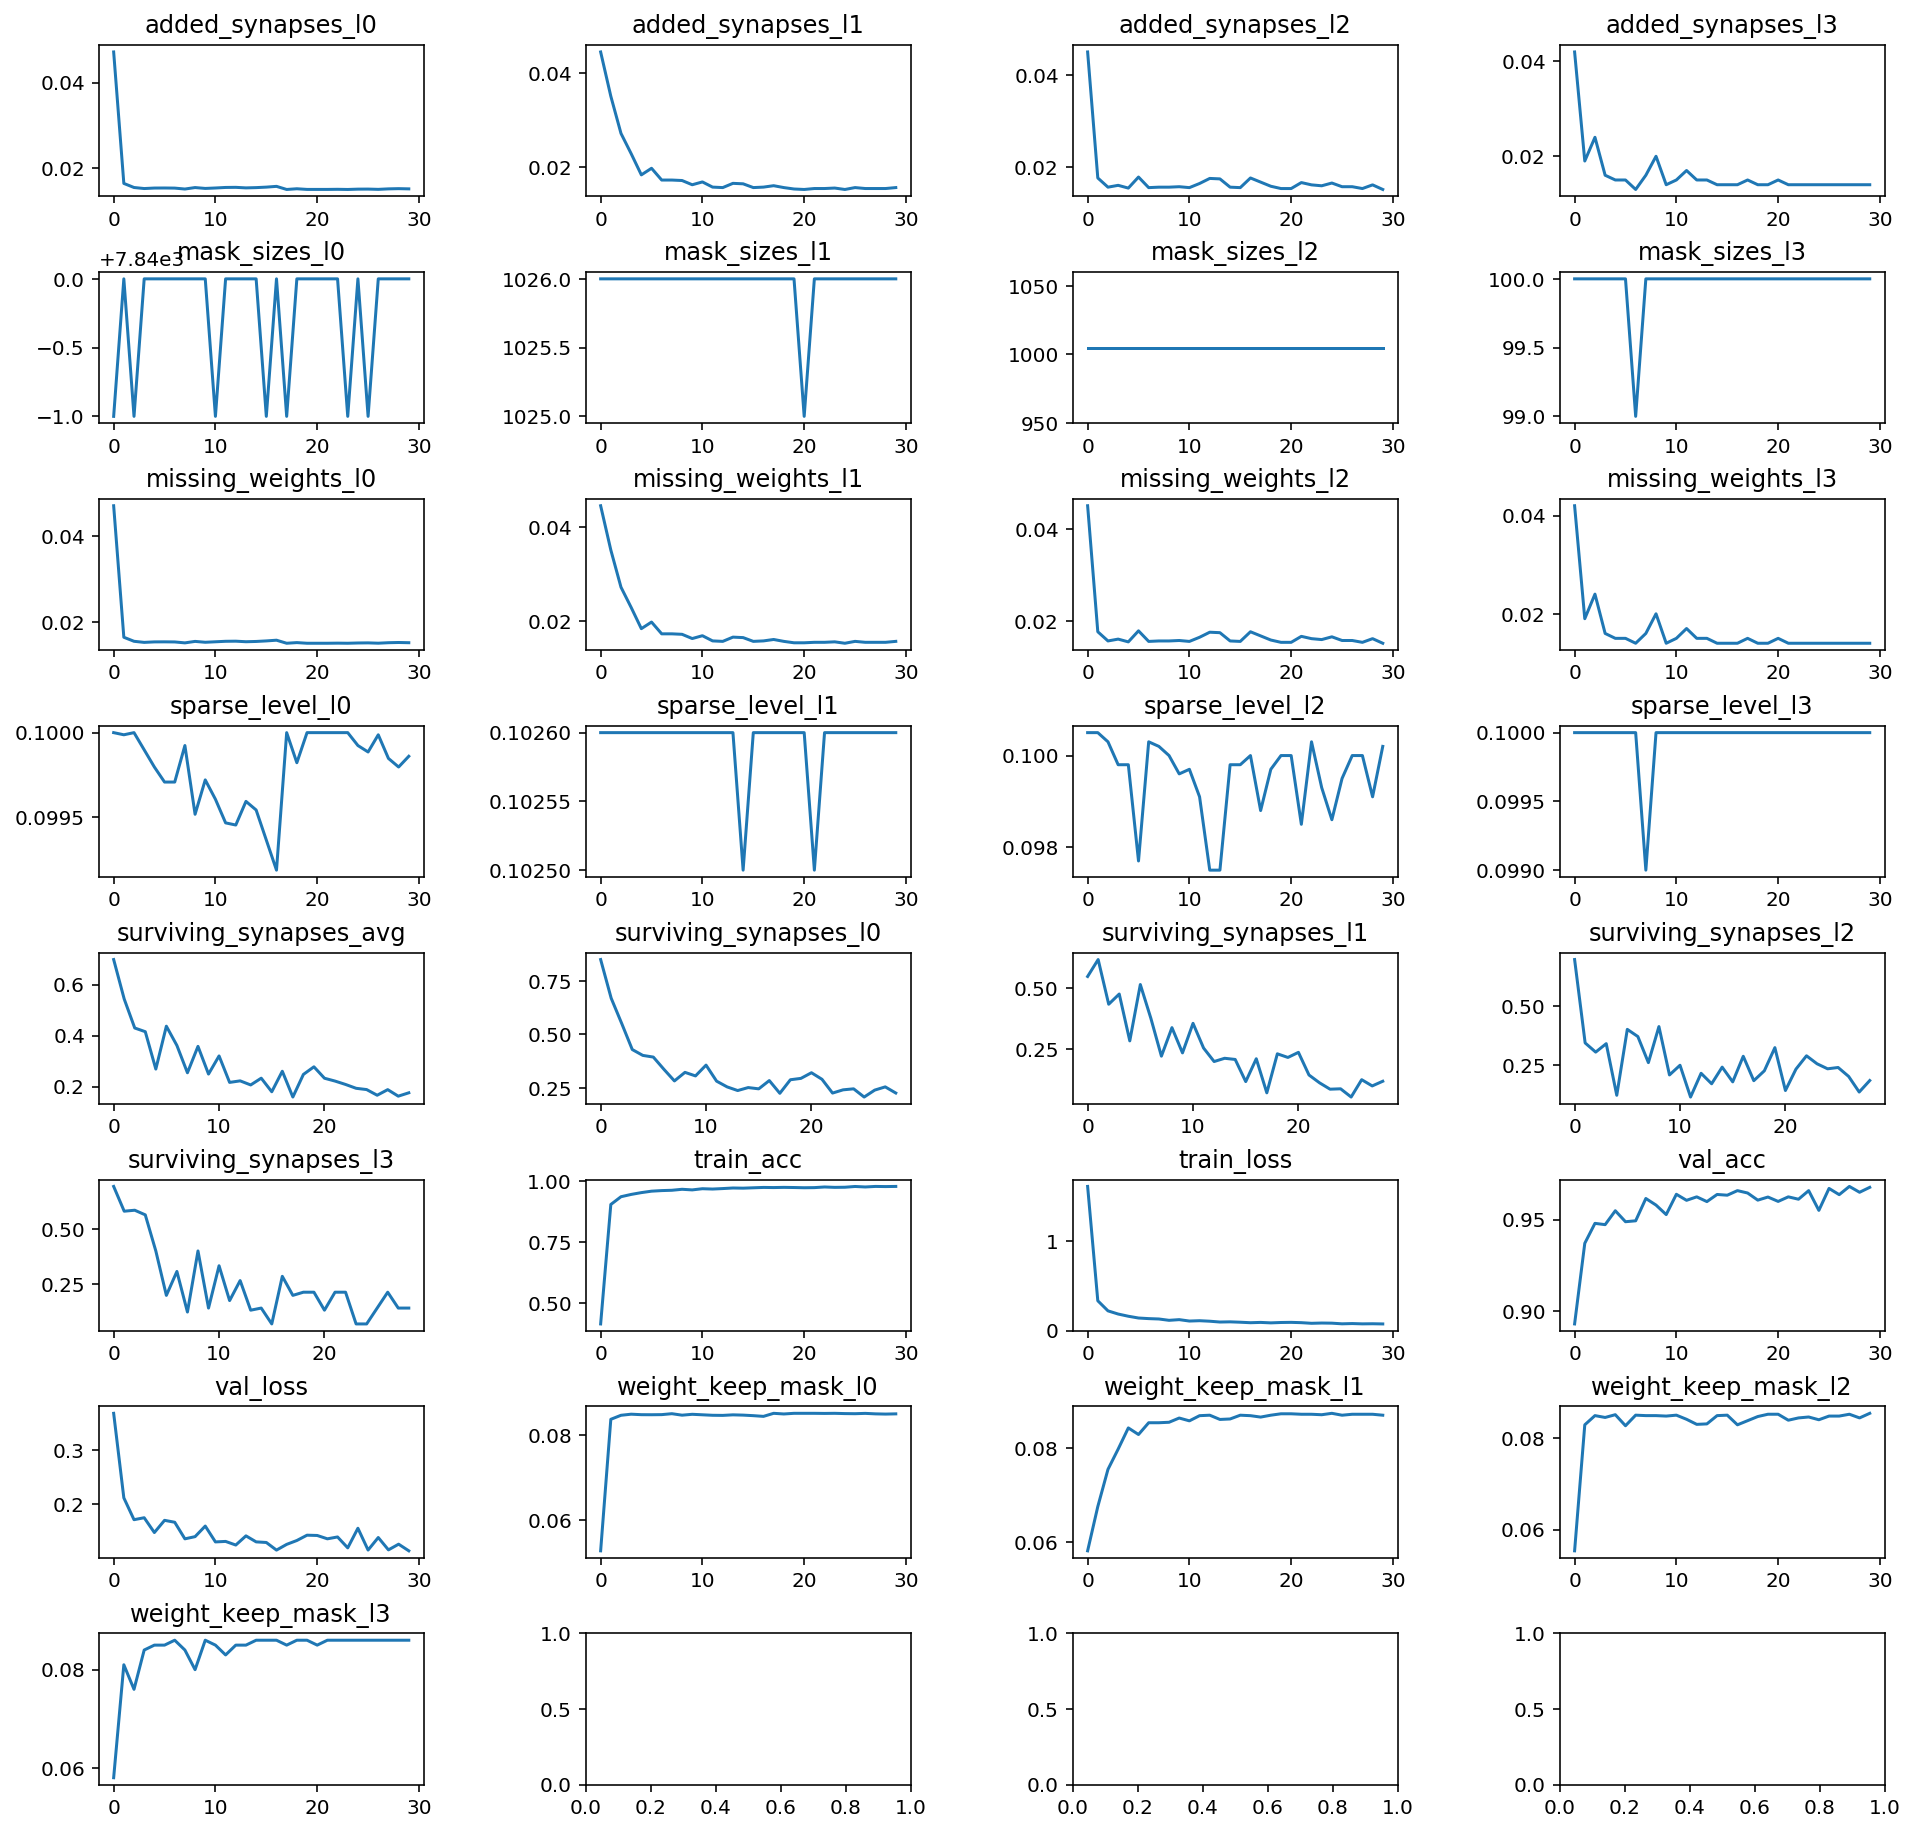

In [14]:
results = dynamic_sparse
h, w = math.ceil(len(results)/4), 4 
combinations = []
for i in range(h):
    for j in range(w):
        combinations.append((i,j))

fig, axs = plt.subplots(h, w, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(16,16)
for (i, j), k in zip(combinations[:len(results)], sorted(results.keys())):
    axs[i, j].plot(range(len(results[k])), results[k])
    axs[i, j].set_title(k)


## Small dense

In [15]:
from models_module.base_models import BaseModel
from networks_module.hebbian_networks import MLP
# load a regular network
config = dict(
    hidden_sizes = [12,16,23]
)
network = MLP(config=config)
# load a regular base model for training
model = BaseModel(network=network)
model.setup()

In [16]:
%%time
small_dense = model.train(dataset, 30, test_noise=False);

Train acc: 0.8348, Val acc: 0.9100
Train acc: 0.9105, Val acc: 0.9186
Train acc: 0.9173, Val acc: 0.9207
Train acc: 0.9196, Val acc: 0.9185
Train acc: 0.9255, Val acc: 0.9275
Train acc: 0.9286, Val acc: 0.9199
Train acc: 0.9304, Val acc: 0.9277
Train acc: 0.9306, Val acc: 0.9249
Train acc: 0.9317, Val acc: 0.9195
Train acc: 0.9338, Val acc: 0.9266
Train acc: 0.9344, Val acc: 0.9300
Train acc: 0.9364, Val acc: 0.9352
Train acc: 0.9349, Val acc: 0.9284
Train acc: 0.9366, Val acc: 0.9340
Train acc: 0.9368, Val acc: 0.9323
Train acc: 0.9351, Val acc: 0.9248
Train acc: 0.9361, Val acc: 0.9309
Train acc: 0.9364, Val acc: 0.9350
Train acc: 0.9375, Val acc: 0.9314
Train acc: 0.9368, Val acc: 0.9339
Train acc: 0.9372, Val acc: 0.9352
Train acc: 0.9361, Val acc: 0.9310
Train acc: 0.9365, Val acc: 0.9334
Train acc: 0.9394, Val acc: 0.9311
Train acc: 0.9365, Val acc: 0.9339
Train acc: 0.9385, Val acc: 0.9339
Train acc: 0.9384, Val acc: 0.9283
Train acc: 0.9389, Val acc: 0.9297
Train acc: 0.9388, V

## Comparing all

In [32]:
from matplotlib import rcParams
rcParams['image.cmap'] = 'Accent'


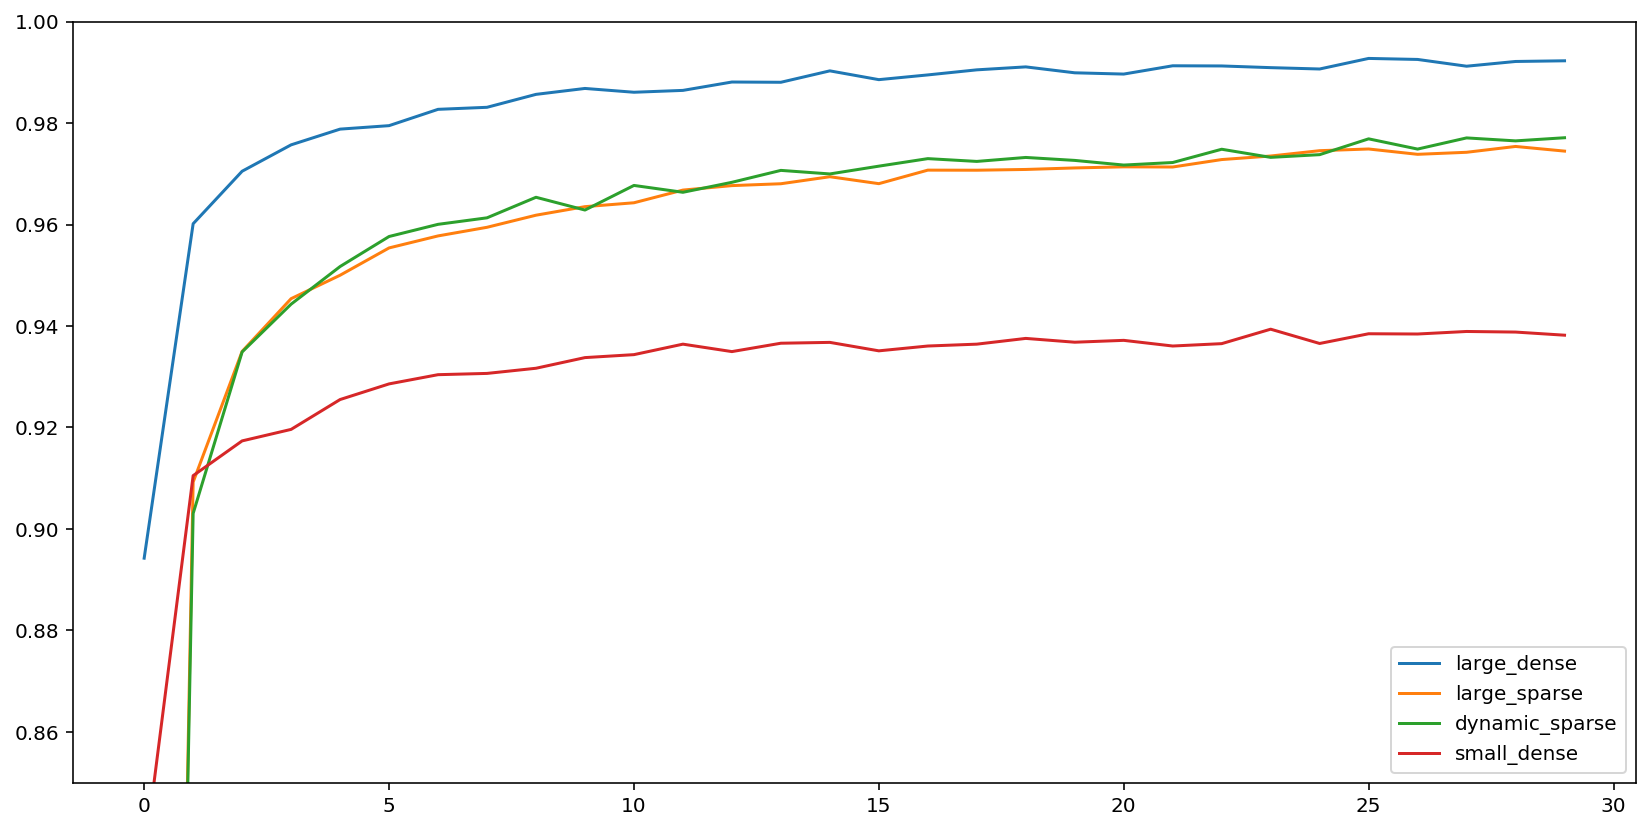

In [37]:
plt.figure(figsize=(14,7))
names = ['large_dense', 'large_sparse', 'dynamic_sparse', 'small_dense']
for name, res in zip(names, [large_dense, large_sparse, dynamic_sparse, small_dense]):
    plt.plot(res['train_acc'], label=name)
plt.legend()
plt.ylim((0.85,1.0));

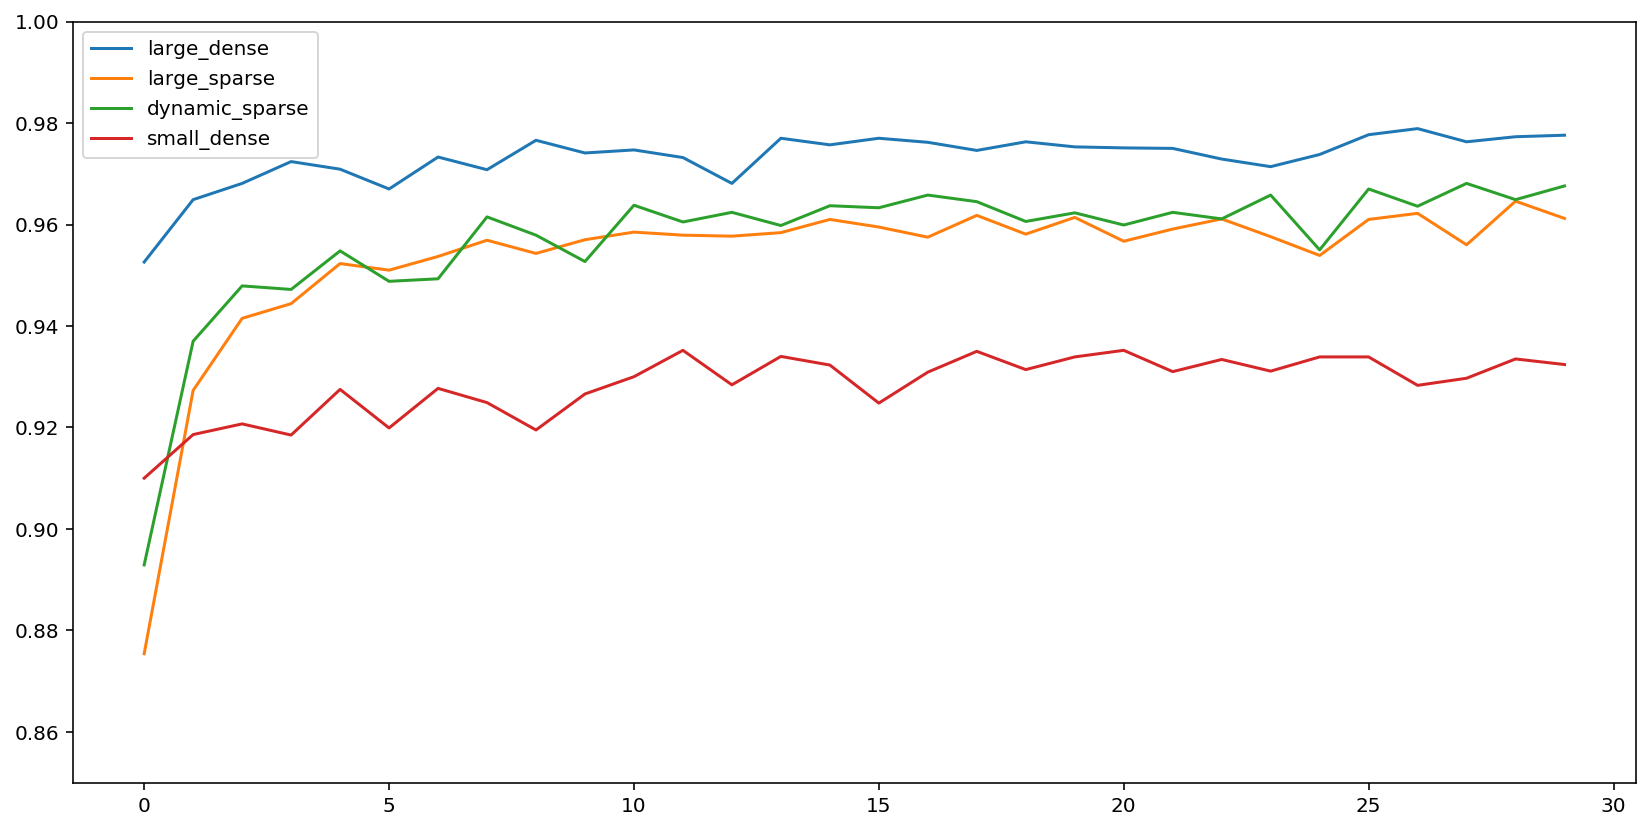

In [38]:
plt.figure(figsize=(14,7))
names = ['large_dense', 'large_sparse', 'dynamic_sparse', 'small_dense']
for name, res in zip(names, [large_dense, large_sparse, dynamic_sparse, small_dense]):
    plt.plot(res['val_acc'], label=name)
plt.legend()
plt.ylim((0.85,1.0));

## Test with kwinners

In [53]:
from models_module.base_models import BaseModel, SparseModel, DSNNMixedHeb
from networks_module.hebbian_networks import MLP, MLPHeb

In [54]:
# load dataset
config = (dict(
    dataset_name="MNIST",
    data_dir="~/nta/datasets",
    test_noise=True
))
dataset = Dataset(config)

In [55]:
test_noise = True
use_kwinners = True
epochs = 30
on_perc = 0.1

# large dense
config = dict(hidden_sizes=[100,100,100], use_kwinners=use_kwinners)
network = MLP(config=config)
model = BaseModel(network=network)
model.setup()
print("\nLarge Dense")
large_dense = model.train(dataset, epochs, test_noise=test_noise);

# large sparse
config = dict(hidden_sizes=[100,100,100], use_kwinners=use_kwinners)
network = MLP(config=config)
config = dict(debug_sparse=True, on_perc=on_perc)
model = SparseModel(network=network, config=config)
model.setup()
print("\nLarge Sparse")
large_sparse = model.train(dataset, epochs, test_noise=test_noise);

# dynamic sparse
config = dict(hidden_sizes=[100,100,100], use_kwinners=use_kwinners)
network = MLPHeb(config=config)
config = dict(
    weight_prune_perc=0.15,
    hebbian_prune_perc=0.60,
    pruning_es =False,
    pruning_active=True,
    pruning_interval=1,
    debug_sparse=True,
    on_perc=on_perc,
)
model = DSNNMixedHeb(network=network, config=config)
model.setup()
print("\nDynamic Sparse")
dynamic_sparse = model.train(dataset, epochs, test_noise=test_noise);

# small dense
config = dict(hidden_sizes=[12,16,23], use_kwinners=use_kwinners)
network = MLP(config=config)
# load a regular base model for training
model = BaseModel(network=network)
model.setup()
print("\nSmall Dense")
small_dense = model.train(dataset, epochs, test_noise=test_noise);



Large Dense
Train acc: 0.8824, Val acc: 0.9471, Noise acc: 0.9396
Train acc: 0.9552, Val acc: 0.9410, Noise acc: 0.9366
Train acc: 0.9648, Val acc: 0.9551, Noise acc: 0.9520
Train acc: 0.9670, Val acc: 0.9623, Noise acc: 0.9588
Train acc: 0.9700, Val acc: 0.9670, Noise acc: 0.9624
Train acc: 0.9705, Val acc: 0.9617, Noise acc: 0.9584
Train acc: 0.9717, Val acc: 0.9636, Noise acc: 0.9575
Train acc: 0.9758, Val acc: 0.9614, Noise acc: 0.9538
Train acc: 0.9710, Val acc: 0.9548, Noise acc: 0.9508
Train acc: 0.6177, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.09

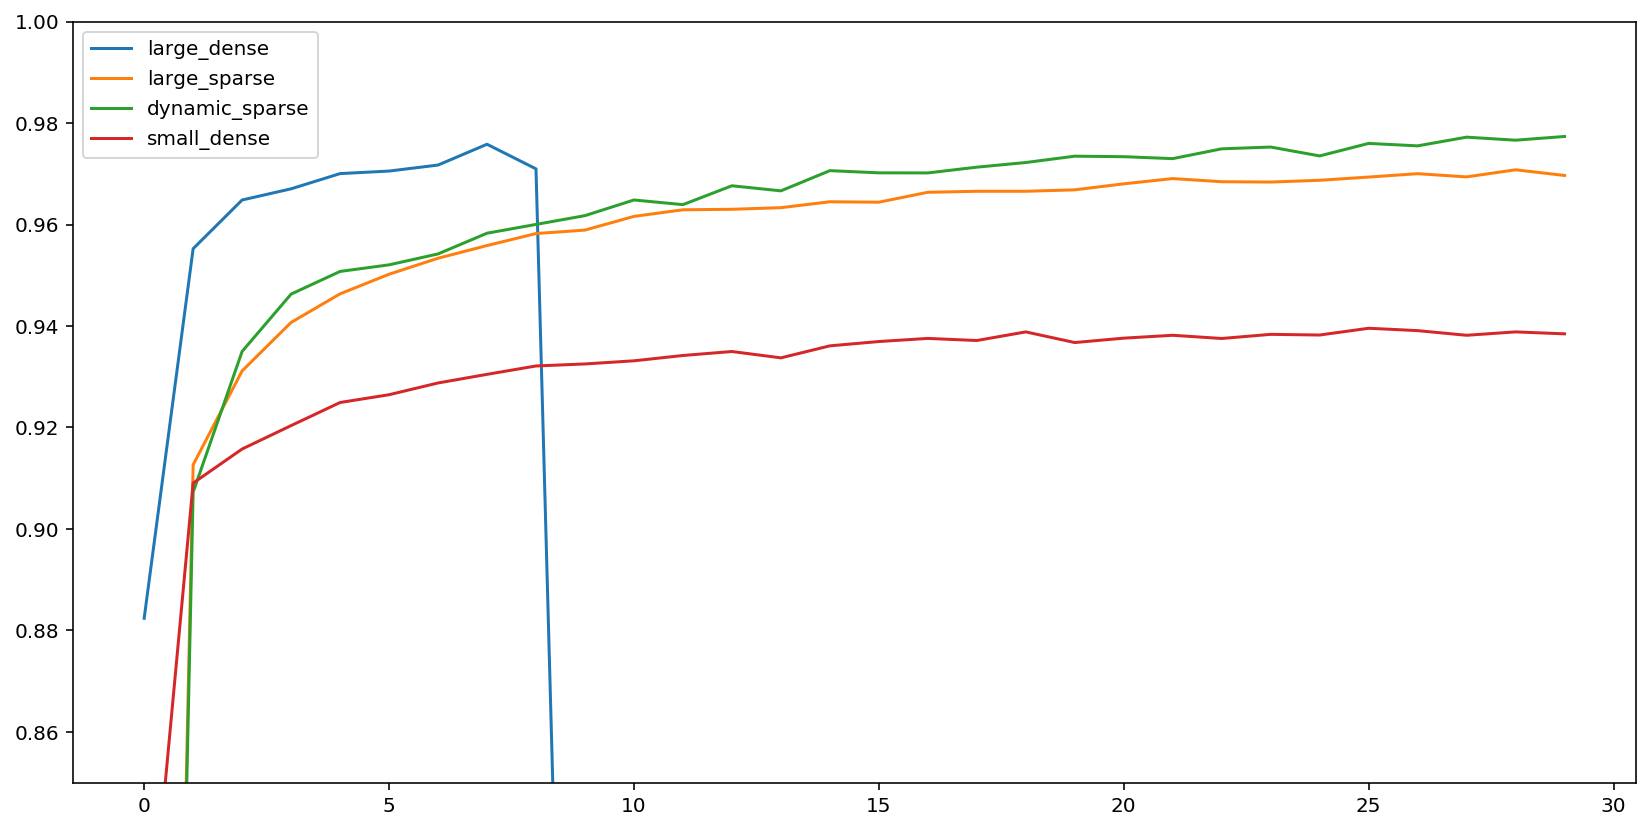

In [56]:
plt.figure(figsize=(14,7))
names = ['large_dense', 'large_sparse', 'dynamic_sparse', 'small_dense']
for name, res in zip(names, [large_dense, large_sparse, dynamic_sparse, small_dense]):
    plt.plot(res['train_acc'], label=name)
plt.legend()
plt.ylim((0.85,1.0));

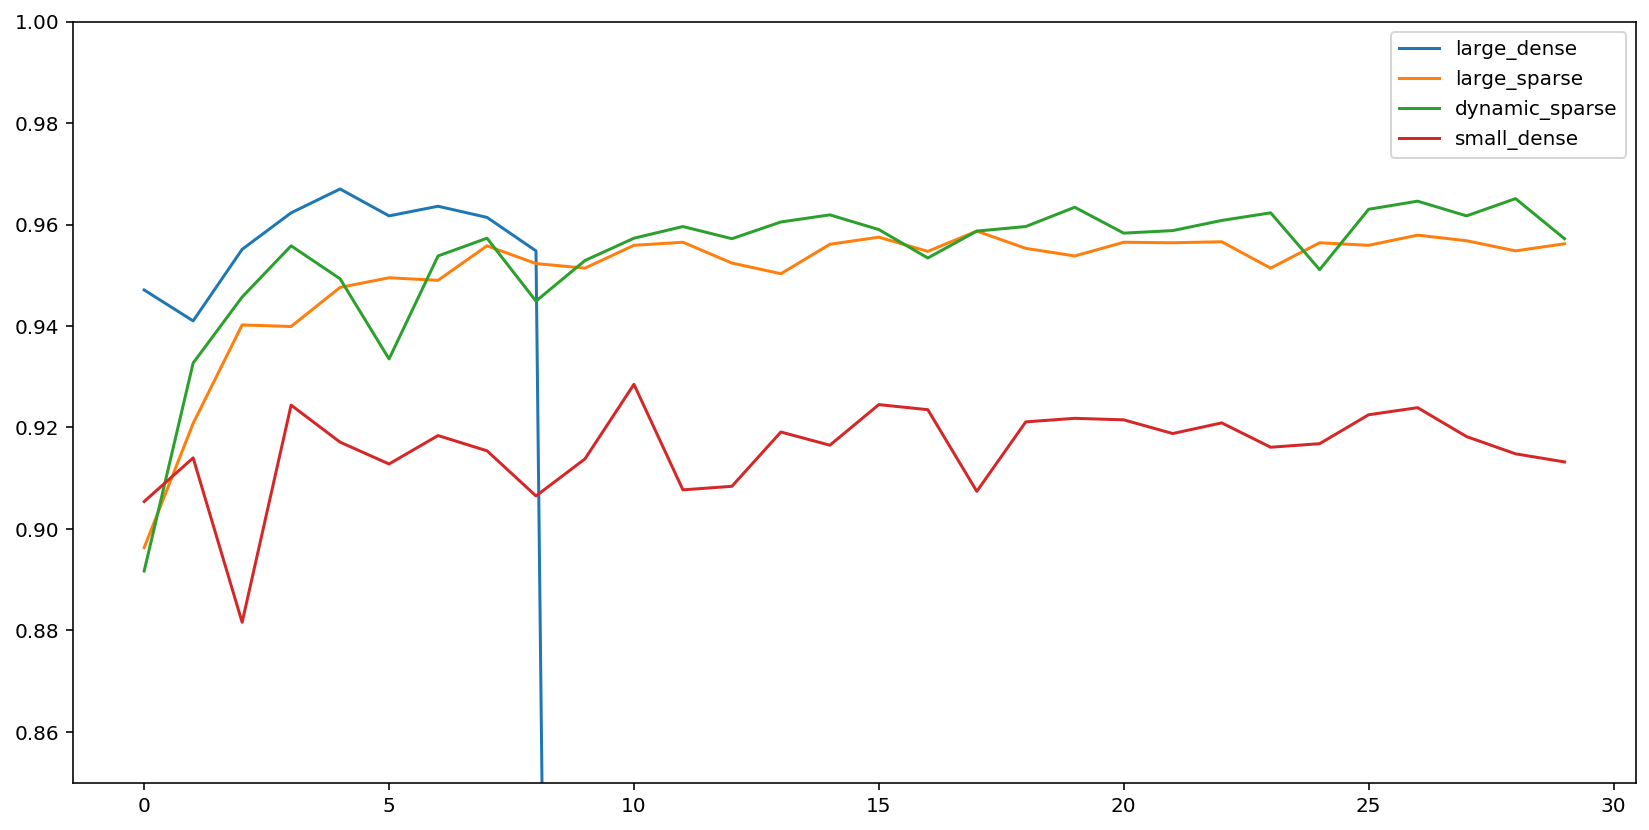

In [57]:
plt.figure(figsize=(14,7))
names = ['large_dense', 'large_sparse', 'dynamic_sparse', 'small_dense']
for name, res in zip(names, [large_dense, large_sparse, dynamic_sparse, small_dense]):
    plt.plot(res['val_acc'], label=name)
plt.legend()
plt.ylim((0.85,1.0));

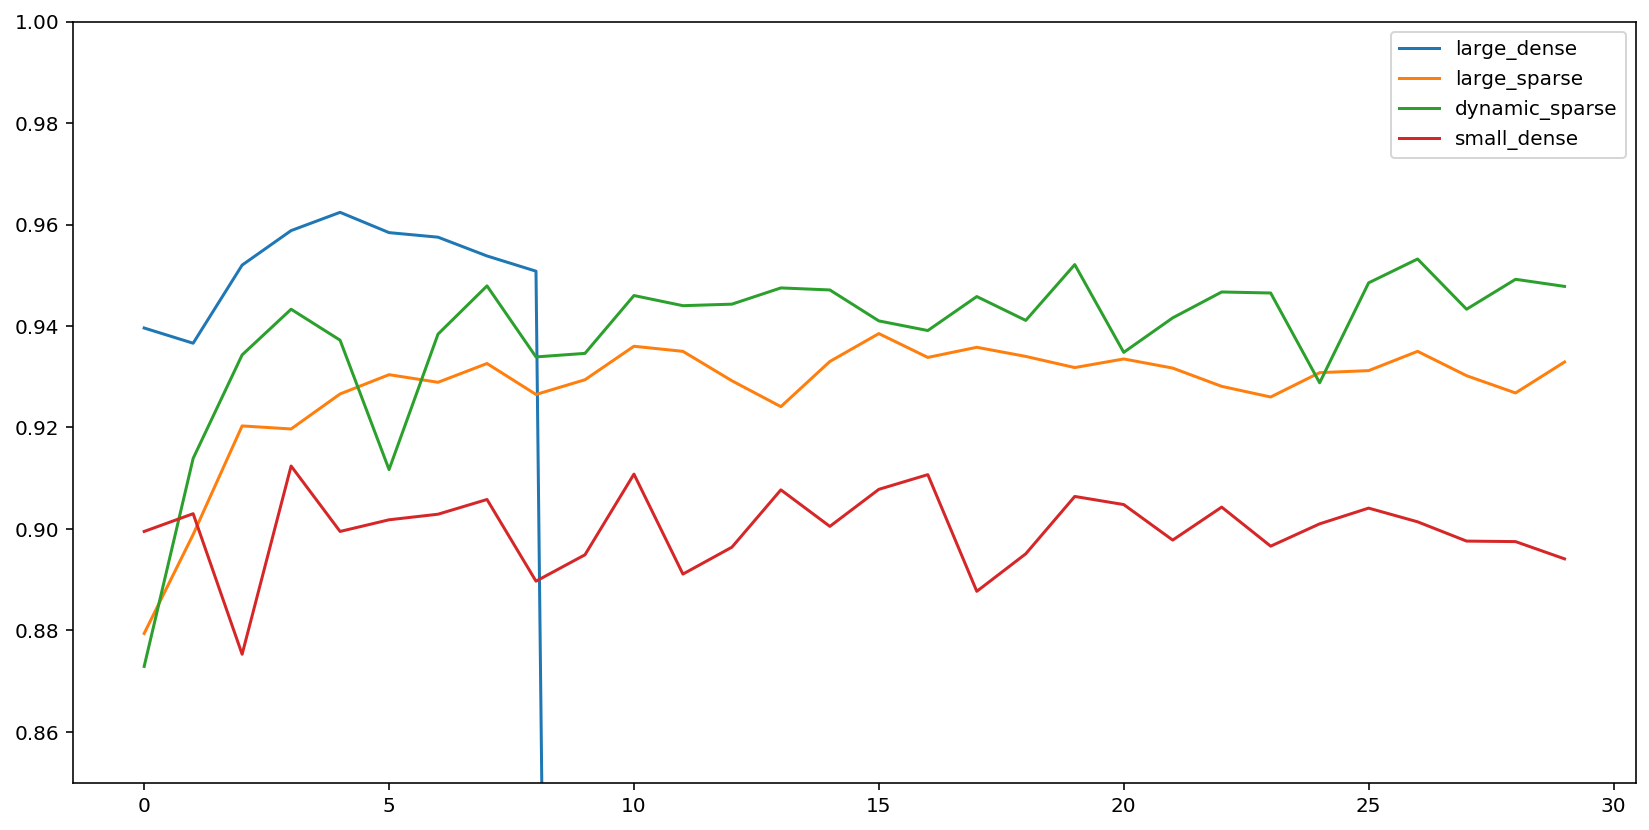

In [58]:
plt.figure(figsize=(14,7))
names = ['large_dense', 'large_sparse', 'dynamic_sparse', 'small_dense']
for name, res in zip(names, [large_dense, large_sparse, dynamic_sparse, small_dense]):
    plt.plot(res['noise_acc'], label=name)
plt.legend()
plt.ylim((0.85,1.0));